# TASK 1: 
### We will apply SVM to image recognition, a classic problem with a very large dimensional space (the value of each pixel of the image is considered as a feature).


# Objective: 
### What we will try to do is, given an image of a person's face, predict to which of the possible people from a list does it belongs (this kind of approach is used, for example, in social network applications to automatically tag people within photographs). 

# Dataset: 
### Our learning set will be a group of labeled images of peoples' faces, and we will try to learn a model that can predict the label of unseen instances.

# Approach: 
### The intuitive and first approach would be to use the image pixels as features for the learning algorithm, so pixel values will be our learning attributes and the individual's label will be our target class.


In [3]:
# Our dataset is provided within scikit-learn, 
# so let's start by importing and printing its description.

import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print (faces.keys())
print (faces.DESCR)


dict_keys(['data', 'images', 'target', 'DESCR'])
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Charac

### The dataset contains 400 images of 40 different persons. 

### The photos were taken with different light conditions and facial expressions (including open/closed eyes, smiling/not smiling, and with glasses/no glasses). 

##### For additional information about the dataset refer to http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html.

    
### Looking at the content of the faces object, 
### we get the following properties: images, data, and target. 
### Images contain the 400 images represented as 64 x 64 pixel matrices. 
### data contains the same 400 images but as array of 4096 pixels. 
### target is, as expected, an array with the target classes, ranging from 0 to 39.


In [5]:
print (faces.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [6]:
print (faces.images.shape)

(400, 64, 64)


In [7]:
print (faces.data.shape)

(400, 4096)


In [8]:
print (faces.target.shape)

(400,)


#### Normalizing the data is important as we saw in the previous session. 
#### It is also important for the application of SVM to obtain good results.
#### In our particular case, we can verify by running the following snippet 
#### that our images already come as values in a very uniform range 
#### between 0 and 1 (pixel value):
#### Therefore, we do not have to normalize the data.



In [9]:
print (np.max(faces.data))

1.0


In [10]:
print (np.min(faces.data))

0.0


In [11]:
print (np.mean(faces.data))

0.5470426


### Before learning, let's plot some faces. We will define the following helper function:


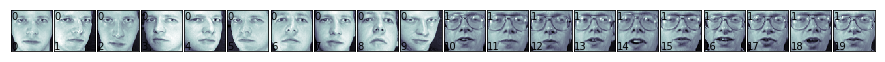

In [12]:
%matplotlib inline
def print_faces(images, target, top_n):
# set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)

        # label the image with the target value
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))


print_faces(faces.images, faces.target, 20)

# Training a Support Vector Machine

### To use SVM in scikit-learn to solve our task, we will import the SVC class from the sklearn.svm module.

### The Support Vector Classifier (SVC) will be used for classification. 

### In the last section of this session, we will use SVM for regression tasks.
### The SVC implementation has different important parameters; probably the most relevant is kernel, which defines the kernel function to be used in our classifier 
##### (think of the kernel functions as different similarity measures between instances).


### By default, the SVC class uses the rbf kernel, which allows us to model nonlinear problems. 
##### To start, we will use the simplest kernel, the linear one.


In [13]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')

### Before continuing, we will split our dataset into training and testing datasets.


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( faces.data, faces.target, test_size=0.25, random_state=0)
### random_state : int or RandomState instance or None (default) Pseudo 
### Random Number generator seed control. If None, use the numpy.random 
### singleton. Note that different initializations might result in different
### local minima of the cost function.

### And we will define a function to evaluate K-fold cross-validation.

### Cross-validation with five folds, obtains pretty good results (accuracy of 0.933). In a few steps we obtained a face classifier.

In [19]:
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator
    cv = KFold(len(y), shuffle=True, random_state=0)
    # by default the score used is the one returned by score method 
    # of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)

    print (("Mean score: {0:.3f} (+/-{1:.3f})").format( np.mean(scores), sem(scores)))


evaluate_cross_validation(svc_1, X_train, y_train, 5)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 0.947 (+/-0.013)


### Cross-validation with five folds, obtains pretty good results (accuracy of 0.933). In a few steps we obtained a face classifier.

### We will also define a function to perform training on the training set and evaluate the performance on the testing set.


In [21]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):

    clf.fit(X_train, y_train)

    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))

    y_pred = clf.predict(X_test)
    
    #print "predicted out :::: ",y_pred

    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

# If we train and evaluate, the classifier performs the operation with 
# almost no errors.


train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         